### Ex1

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(0)
%matplotlib inline

def load_data_from_file(fileName='data/advertising.csv'):
    data = np.genfromtxt(fileName, dtype=None, delimiter=',', skip_header=1)
    features_X = data[:, :3]
    sales_Y = data[:, 3]
    
    features_X = np.hstack((np.ones((features_X.shape[0], 1)), features_X))
    
    return features_X, sales_Y

In [5]:
data = np.genfromtxt('data/advertising.csv', dtype=None, delimiter=',', skip_header=1)
data[:, 3]

array([22.1, 10.4, 12. , 16.5, 17.9,  7.2, 11.8, 13.2,  4.8, 15.6, 12.6,
       17.4,  9.2, 13.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 17.5,
        5.6, 20.5,  9.7, 17. , 15. , 20.9, 18.9, 10.5, 21.4, 11.9, 13.2,
       17.4, 11.9, 17.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 17.9,
        8.5, 16.1, 10.6, 23.2, 19.8,  9.7, 16.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 20.7, 14. , 16. , 11.3,
       11. , 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 17.3, 11.3, 13.6, 21.7, 20.2, 12. , 16. ,
       12.9, 16.7, 14. ,  7.3, 19.4, 22.2, 11.5, 16.9, 16.7, 20.5, 25.4,
       17.2, 16.7, 23.8, 19.8, 19.7, 20.7, 15. ,  7.2, 12. ,  5.3, 19.8,
       18.4, 21.8, 17.1, 20.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 16.6, 15.2, 19.7, 10.6,  6.6, 11.9, 24.7,  9.7,  1.6, 17.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 12.3, 10.3, 18.2, 25.4, 10.9, 10.1, 16

In [15]:
#Q2 -> A
features_X , _ = load_data_from_file ()
print ( features_X [:5 ,:])

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]


In [16]:
#Q3 -> B
_ , sales_Y = load_data_from_file ()
print ( sales_Y . shape )

(200,)


### Ex2

In [59]:
def create_individual(n=4, bound=10):
    individual = [random.uniform(-bound / 2, bound / 2) for _ in range(n)]
    return individual
    
individual = create_individual ()
print ( individual )

[3.4442185152504816, 2.5795440294030243, -0.79428419169155, -2.4108324970703663]


### Ex3

In [58]:
features_X , sales_Y = load_data_from_file ()

def compute_loss(individual):
    theta = np.array(individual)
    y_hat = features_X.dot(theta)
    loss = np.mean((y_hat - sales_Y) ** 2)
    return loss

def compute_fitness(individual):
    loss = compute_loss(individual)
    fitness_value = 1 / (loss + 1)
    return fitness_value

In [21]:
#Q4 -> C
features_X , sales_Y = load_data_from_file ()
individual = [4.09 , 4.82 , 3.10 , 4.02]
fitness_score = compute_fitness ( individual )
print ( fitness_score )

1.0185991537088997e-06


### Ex4

In [60]:
def crossover(individual1, individual2, crossover_rate=0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()
    
    if np.random.rand() < crossover_rate:
        crossover_point = np.random.randint(1, len(individual1_new))
        individual1_new[crossover_point:] = individual2_new[crossover_point:]
        individual2_new[crossover_point:] = individual1[crossover_point:]  # Fixed here
    
    return individual1_new, individual2_new

In [41]:
# Q5 -> A?

individual1 = [4.09 , 4.82 , 3.10 , 4.02]
individual2 = [3.44 , 2.57 , -0.79 , -2.41]
individual1 , individual2 = crossover ( individual1 , individual2 , 2.0)
print (" individual1 : " , individual1 )
print (" individual2 : " , individual2 )

 individual1 :  [4.09, 4.82, -0.79, -2.41]
 individual2 :  [3.44, 2.57, 3.1, 4.02]


### Ex5

In [61]:
def mutate(individual, mutation_rate=0.1):
    individual_m = individual.copy()
    
    for i in range(len(individual_m)):
        if np.random.rand() < mutation_rate:
            individual_m[i] += np.random.uniform(-1.0, 1.0)
    
    return individual_m

In [46]:
# Q6 -> True
before_individual = [4.09 , 4.82 , 3.10 , 4.02]
after_individual = mutate ( individual , mutation_rate = 0.2)
print ( before_individual == after_individual )

True


### Ex6

In [62]:
def initializePopulation(m):
    population = [create_individual() for _ in range(m)]
    return population

### Ex7

In [63]:
def selection(sorted_old_population, m=100):
    index1 = random.randint(0, m - 1)
    index2 = random.choice([i for i in range(m) if i != index1])
    individual_s = sorted_old_population[index1] if np.random.rand() < 0.5 else sorted_old_population[index2]
    return individual_s

### Ex8

In [64]:
def create_new_population(old_population, elitism=2, gen=1):
    m = len(old_population)
    sorted_population = sorted(old_population, key=compute_fitness)
    if gen % 1 == 0:
        print("Best loss:", compute_loss(sorted_population[m - 1]), "with chromosome:", sorted_population[m - 1])
    
    new_population = []
    
    while len(new_population) < m - elitism:
        parent1 = selection(sorted_population, m)
        parent2 = selection(sorted_population, m)
        
        offspring1, offspring2 = crossover(parent1, parent2)
        
        offspring1 = mutate(offspring1)
        offspring2 = mutate(offspring2)
        
        new_population.append(offspring1)
        new_population.append(offspring2)
    
    for ind in sorted_population[m - elitism:]:
        new_population.append(ind)
    
    return new_population, compute_loss(sorted_population[m - 1])

In [49]:
#Q7 -> A
individual1 = [4.09 , 4.82 , 3.10 , 4.02]
individual2 = [3.44 , 2.57 , -0.79 , -2.41]
old_population = [ individual1 , individual2 ]
new_population , _ = create_new_population ( old_population , elitism =2 , gen =1)

Best loss: 123415.051528805 with chromosome: [3.44, 2.57, -0.79, -2.41]


### Ex9

In [65]:
def run_GA():
    n_generations = 100
    m = 600
    features_X, sales_Y = load_data_from_file()
    population = initializePopulation(m)
    losses_list = []
    
    for i in range(n_generations):
        new_population, best_loss = create_new_population(population)
        losses_list.append(best_loss)
        population = new_population
    
    return losses_list

### Ex10

Best loss: 498.9947074060653 with chromosome: [-0.11793297084577237, 0.10328753627054343, 1.2750940536208555, -0.5206873329381025]
Best loss: 498.9947074060653 with chromosome: [-0.11793297084577237, 0.10328753627054343, 1.2750940536208555, -0.5206873329381025]
Best loss: 167.09102178727287 with chromosome: [-2.9984525837193665, 0.10328753627054343, 0.5845964459517132, -0.5206873329381025]
Best loss: 149.8754834105071 with chromosome: [-0.9653267542185242, 0.10328753627054343, 0.5845964459517132, -0.5206873329381025]
Best loss: 149.8754834105071 with chromosome: [-0.9653267542185242, 0.10328753627054343, 0.5845964459517132, -0.5206873329381025]
Best loss: 149.8754834105071 with chromosome: [-0.9653267542185242, 0.10328753627054343, 0.5845964459517132, -0.5206873329381025]
Best loss: 139.55522291255915 with chromosome: [2.4253768554792217, 0.10328753627054343, 0.5845964459517132, -0.5206873329381025]
Best loss: 139.55522291255915 with chromosome: [2.4253768554792217, 0.10328753627054343

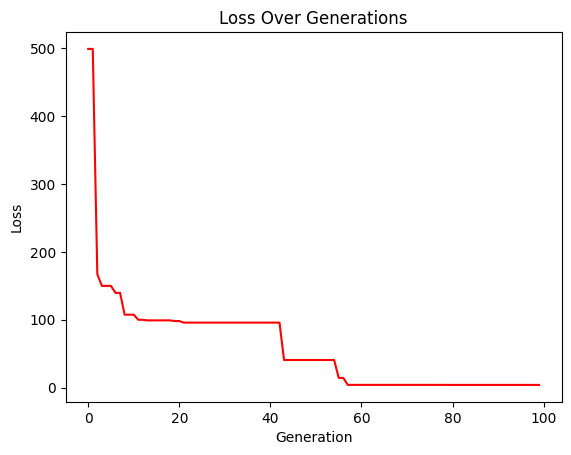

In [67]:
import matplotlib.pyplot as plt

def visualize_loss(losses_list):
    plt.plot(losses_list, linestyle='-', color='red')
    plt.title("Loss Over Generations")
    plt.xlabel("Generation")
    plt.ylabel("Loss")
    plt.show()
    
losses_list = run_GA ()
visualize_loss(losses_list)

### Ex11

Best loss: 316.18012414460895 with chromosome: [-3.1893559738040587, 0.10958972351263085, 0.194889966191381, -0.515028490668473]
Best loss: 232.35143486475405 with chromosome: [-4.831992143252821, 0.16598963722877436, -0.4620774340451135, 0.41264358181520944]
Best loss: 232.35143486475405 with chromosome: [-4.831992143252821, 0.16598963722877436, -0.4620774340451135, 0.41264358181520944]
Best loss: 232.35143486475405 with chromosome: [-4.831992143252821, 0.16598963722877436, -0.4620774340451135, 0.41264358181520944]
Best loss: 232.35143486475405 with chromosome: [-4.831992143252821, 0.16598963722877436, -0.4620774340451135, 0.41264358181520944]
Best loss: 232.35143486475405 with chromosome: [-4.831992143252821, 0.16598963722877436, -0.4620774340451135, 0.41264358181520944]
Best loss: 232.35143486475405 with chromosome: [-4.831992143252821, 0.16598963722877436, -0.4620774340451135, 0.41264358181520944]
Best loss: 225.1453462975604 with chromosome: [0.7985672324542494, 0.1095897235126308

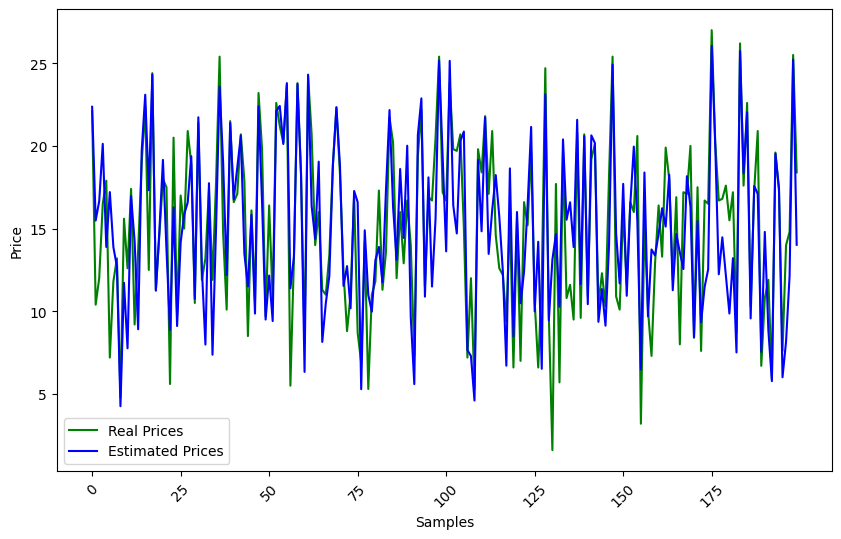

In [76]:
def run_GA():
    n_generations = 100
    m = 600
    features_X, sales_Y = load_data_from_file()
    population = initializePopulation(m)
    losses_list = []
    population_history = []

    for i in range(n_generations):
        new_population, best_loss = create_new_population(population)
        losses_list.append(best_loss)
        population_history.append(new_population)
        population = new_population
    
    return losses_list, population_history

def visualize_predict_gt(population, sales_Y): 
    sorted_population = sorted(population, key=compute_fitness)
    print(sorted_population[-1])
    theta = np.array(sorted_population[-1])
    estimated_prices = features_X.dot(theta)

    fig, ax = plt.subplots(figsize=(10, 6))
    plt.xlabel('Samples')
    plt.ylabel('Price')
    plt.plot(sales_Y, c='green', label='Real Prices')
    plt.plot(estimated_prices, c='blue', label='Estimated Prices')
    plt.xticks(ticks=np.arange(0, len(sales_Y), 25), labels=np.arange(0, len(sales_Y), 25), rotation=45)
    plt.legend()
    plt.show()

losses_list, population_history = run_GA()
visualize_predict_gt(population_history[-1], sales_Y)